In [1]:
# En este notebook aprenderemos a:
# Leer los datos con PySpark
# Realizar transformaciones
# Guardar los dataframes como tablas Delta
# Crear un modelo estrella para análisis

#Configuración inicial y verificación del entorno
# Este comando verifica que estamos en el entorno correcto de Fabric

import pyspark.sql.functions as F
from pyspark.sql.types import *
from notebookutils import mssparkutils
import pandas as pd

# Verificar versión de Spark
print(f"Versión de Spark: {spark.version}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 3, Finished, Available, Finished)

Versión de Spark: 3.5.1.5.4.20250519.1


In [2]:
# Crear estructura de carpetas en el lakehouse
# Este comando crea las carpetas necesarias en el lakehouse para almacenar nuestros archivos

try:
    # Crear carpetas para datos brutos y procesados
    # mssparkutils.fs.mkdirs("Files/raw_test")
    mssparkutils.fs.mkdirs("Files/silver")
    mssparkutils.fs.mkdirs("Files/gold")
    mssparkutils.fs.mkdirs("Files/processed")
    print("✅ Estructura de carpetas creada correctamente")
except Exception as e:
    print(f"Error al crear carpetas: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 4, Finished, Available, Finished)

✅ Estructura de carpetas creada correctamente


In [3]:

# Definición de esquemas para mejor control de los datos
# Definimos los esquemas de nuestros dataframes para asegurar tipos de datos correctos

# Esquema para brokers
schema_brokers = StructType([
    StructField("broker_id", IntegerType(), False),
    StructField("broker_name", StringType(), True),
    StructField("region", StringType(), True),
    StructField("email", StringType(), True)
])

# Esquema para campañas
schema_campaigns = StructType([
    StructField("campaign_id", IntegerType(), False),
    StructField("channel", StringType(), True),
    StructField("campaign_name", StringType(), True),
    StructField("start_date", DateType(), True),
    StructField("end_date", DateType(), True),
    StructField("budget_usd", DoubleType(), True),
])

# Esquema para clientes
schema_clients = StructType([
    StructField("client_id", IntegerType(), False),
    StructField("first_name", StringType(), True),
    StructField("last_name", StringType(), True),
    StructField("email", StringType(), True),
    StructField("region", StringType(), True),
])

# Esquema para leads
schema_leads = StructType([
    StructField("lead_id", IntegerType(), False),
    StructField("client_id", IntegerType(), False),
    StructField("property_id", IntegerType(), False),
    StructField("campaign_id", IntegerType(), False),
    StructField("lead_date", DateType(), True),
    StructField("lead_source", StringType(), True),    
])

# Esquema para proyectos
schema_projects = StructType([
    StructField("project_id", IntegerType(), False),
    StructField("project_name", StringType(), True),
    StructField("city", StringType(), True),
    StructField("region", StringType(), True),
    StructField("launch_year", StringType(), True),
    StructField("status", StringType(), True),    
])

# Esquema para propiedades
schema_properties = StructType([
    StructField("property_id", IntegerType(), False),
    StructField("project_id", IntegerType(), False),
    StructField("property_type", StringType(), True),
    StructField("size_m2", DoubleType(), True),
    StructField("bedrooms", IntegerType(), True),
    StructField("bathrooms", IntegerType(), True),  
    StructField("listprice_usd", DoubleType(), True), 
    StructField("availability_status", StringType(), True),             
])

# Esquema para ventas
schema_sales = StructType([
    StructField("sale_id", IntegerType(), False),
    StructField("property_id", IntegerType(), False),
    StructField("client_id", IntegerType(), False),
    StructField("broker_id", IntegerType(), False),
    StructField("sale_date", DateType(), True),
    StructField("saleprice_usd", DoubleType(), True),
])

print("✅ Esquemas definidos correctamente")

# se podria inferir el esquema (con infer schema en spark) pero no es buena practica.


StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 5, Finished, Available, Finished)

✅ Esquemas definidos correctamente


In [7]:
# Leer los archivos CSV con los esquemas definidos
# Este comando lee los archivos CSV utilizando los esquemas definidos anteriormente

try:
    # Leer archivo de brokers
    df_brokers = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_brokers) \
        .load("Files/raw/brokers.csv")

    # Leer archivo de campañas
    df_campaigns = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_campaigns) \
        .load("Files/raw/campaigns.csv")

    # Leer archivo de clientes
    df_clients = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_clients) \
        .load("Files/raw/clients.csv")

    # Leer archivo de leads
    df_leads = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_leads) \
        .load("Files/raw/leads.csv")

    # Leer archivo de proyectos
    df_projects = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_projects) \
        .load("Files/raw/projects.csv")

    # Leer archivo de propiedades
    df_properties = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_properties) \
        .load("Files/raw/properties.csv")

    # Leer archivo de ventas
    df_sales = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_sales) \
        .load("Files/raw/sales.csv")

    print("✅ Archivos CSV leídos correctamente")
except Exception as e:
    print(f"Error al leer archivos: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 9, Finished, Available, Finished)

✅ Archivos CSV leídos correctamente


In [8]:

# Exploración de los datos
# Mostramos una vista previa de los datos cargados
# En produccion los displays ya no deberian ir, consume recursos computacionales.
# la funcion show consume menos. ejemplo show(df_sales)

print("Vista previa de los datos de brokers:")
display(df_brokers.limit(5))

print("Vista previa de los datos de campañas:")
display(df_campaigns.limit(5))

print("Vista previa de los datos de clientes:")
display(df_clients.limit(5))

print("Vista previa de los datos de leads:")
display(df_leads.limit(5))

print("Vista previa de los datos de proyectos:")
display(df_projects.limit(5))

print("Vista previa de los datos de propiedades:")
display(df_properties.limit(5))

print("Vista previa de los datos de ventas:")
display(df_sales.limit(5))

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 10, Finished, Available, Finished)

Vista previa de los datos de brokers:


SynapseWidget(Synapse.DataFrame, b502f608-6e74-40c2-a3ac-2ec8fdf1c22b)

Vista previa de los datos de campañas:


SynapseWidget(Synapse.DataFrame, 4debfb5a-7b3d-471c-9ce5-2b2bbe68882f)

Vista previa de los datos de clientes:


SynapseWidget(Synapse.DataFrame, 4063c4f7-293b-4b46-a692-09b1fb19a17c)

Vista previa de los datos de leads:


SynapseWidget(Synapse.DataFrame, f258895b-942d-4ae0-b05a-75900d3b2dbb)

Vista previa de los datos de proyectos:


SynapseWidget(Synapse.DataFrame, a50ea509-f0d7-42a7-a1a6-66b39c526f7d)

Vista previa de los datos de propiedades:


SynapseWidget(Synapse.DataFrame, 6ddcccb1-0ad2-4eea-acc0-060175a43957)

Vista previa de los datos de ventas:


SynapseWidget(Synapse.DataFrame, 2040fbcb-3291-4bbc-bd81-83195716c441)

In [9]:
# el metodo show es mas ligero que el display
df_sales.show()

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 11, Finished, Available, Finished)

+-------+-----------+---------+---------+----------+-------------+
|sale_id|property_id|client_id|broker_id| sale_date|saleprice_usd|
+-------+-----------+---------+---------+----------+-------------+
|   6000|       1002|     3028|     2021|2025-07-01|     288727.0|
|   6001|       1009|     3028|     2029|2025-06-03|     160075.0|
|   6002|       1019|     3017|     2017|2025-06-19|     206607.0|
|   6003|       1022|     3018|     2028|2025-06-27|     245332.0|
|   6004|       1026|     3025|     2006|2025-06-03|     227550.0|
|   6005|       1025|     3011|     2024|2025-06-23|     155478.0|
|   6006|       1018|     3021|     2018|2025-06-07|      92411.0|
|   6007|       1020|     3007|     2029|2025-06-13|     140686.0|
|   6008|       1029|     3009|     2018|2025-06-22|     273433.0|
|   6009|       1008|     3024|     2019|2025-07-01|     167085.0|
|   6010|       1028|     3002|     2018|2025-06-21|     118451.0|
|   6011|       1000|     3015|     2017|2025-06-28|     31262

In [10]:
df_sales.count()

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 12, Finished, Available, Finished)

30

In [11]:

# Información sobre los dataframes
# Mostramos el esquema y contamos los registros en cada tabla

print("Información del dataframe de brokers:")
print(f"Número de registros: {df_brokers.count()}")
df_brokers.printSchema()

print("Información del dataframe de campañas:")
print(f"Número de registros: {df_campaigns.count()}")
df_campaigns.printSchema()

print("Información del dataframe de clientes:")
print(f"Número de registros: {df_clients.count()}")
df_clients.printSchema()

print("Información del dataframe de leads:")
print(f"Número de registros: {df_leads.count()}")
df_leads.printSchema()

print("Información del dataframe de proyectos:")
print(f"Número de registros: {df_projects.count()}")
df_projects.printSchema()

print("Información del dataframe de propiedades:")
print(f"Número de registros: {df_properties.count()}")
df_properties.printSchema()

print("Información del dataframe de ventas:")
print(f"Número de registros: {df_sales.count()}")
df_sales.printSchema()


StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 13, Finished, Available, Finished)

Información del dataframe de brokers:
Número de registros: 30
root
 |-- broker_id: integer (nullable = true)
 |-- broker_name: string (nullable = true)
 |-- region: string (nullable = true)
 |-- email: string (nullable = true)

Información del dataframe de campañas:
Número de registros: 30
root
 |-- campaign_id: integer (nullable = true)
 |-- channel: string (nullable = true)
 |-- campaign_name: string (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- budget_usd: double (nullable = true)

Información del dataframe de clientes:
Número de registros: 30
root
 |-- client_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- region: string (nullable = true)

Información del dataframe de leads:
Número de registros: 30
root
 |-- lead_id: integer (nullable = true)
 |-- client_id: integer (nullable = true)
 |-- property_id: integer (nullable = t

In [14]:

# Realizar transformaciones en los dataframes
# Aplicamos transformaciones básicas para mejorar la calidad de los datos

# Transformación de clientes: Añadir columna nombre_completo
df_clients_procesado = df_clients.withColumn(
    "nombre_completo", 
    F.concat(F.col("first_name"), F.lit(" "), F.col("last_name"))
)

# Transformación de propiedades: Añadir columna de precio_m2
df_properties_procesado = df_properties.withColumn(
    "precio_m2", 
    F.col("listprice_usd") / F.col("size_m2")
)

print("✅ Transformaciones aplicadas correctamente")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 16, Finished, Available, Finished)

✅ Transformaciones aplicadas correctamente


In [15]:
# Mostrar ejemplos de las transformaciones
print("Ejemplo de clientes procesados:")
display(df_clients_procesado.limit(5))

print("Ejemplo de propiedades procesados:")
display(df_properties_procesado.limit(5))

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 17, Finished, Available, Finished)

Ejemplo de clientes procesados:


SynapseWidget(Synapse.DataFrame, e8acfc2d-aedf-43b2-88dc-3f45eccea28a)

Ejemplo de propiedades procesados:


SynapseWidget(Synapse.DataFrame, ef318969-f84b-48e2-8d0c-ad347e1a6376)

In [17]:

# Guardar los dataframes como tablas Delta
# Guardamos los dataframes procesados como tablas Delta en el lakehouse

try:
    # Guardar brokers
    df_brokers.write.format("delta").mode("overwrite").save("Files/gold/brokers_delta")
    
    # Guardar campaigns
    df_campaigns.write.format("delta").mode("overwrite").save("Files/gold/campaigns_delta")

    # Guardar clients
    df_clients_procesado.write.format("delta").mode("overwrite").save("Files/gold/clients_delta")
    
    # Guardar leads
    df_leads.write.format("delta").mode("overwrite").save("Files/gold/leads_delta")

    # Guardar projects
    df_projects.write.format("delta").mode("overwrite").save("Files/gold/projects_delta")

    # Guardar propiedades
    df_properties_procesado.write.format("delta").mode("overwrite").save("Files/gold/properties_delta")

    # Guardar ventas
    df_sales.write.format("delta").mode("overwrite").save("Files/gold/sales_delta")    

    print("✅ Dataframes guardados como archivos Delta correctamente")
except Exception as e:
    print(f"Error al guardar archivos Delta: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 19, Finished, Available, Finished)

✅ Dataframes guardados como archivos Delta correctamente


In [20]:
# Registrar tablas como vistas temporales en la sesión actual

try:
    # Registrar tablas como vistas temporales
    df_brokers.createOrReplaceTempView("dim_brokers")
    df_campaigns.createOrReplaceTempView("dim_campaigns")
    df_clients_procesado.createOrReplaceTempView("dim_clients")
    df_leads.createOrReplaceTempView("fact_leads")
    df_projects.createOrReplaceTempView("dim_projects")
    df_properties_procesado.createOrReplaceTempView("dim_properties")    
    df_sales.createOrReplaceTempView("fact_sales")

    # Verificar que se han creado correctamente
    tables = spark.sql("SHOW TABLES").collect()
    print("Tablas disponibles en la sesión:")
    for table in tables:
        print(f" - {table.tableName}")
    
    print("✅ Vistas temporales creadas correctamente para la sesión actual")
    
    # Alternativa: Guardar como tablas directamente en el Lakehouse 
    # Esto registra las tablas en el catálogo del Lakehouse actual
    print("\nRegistrando tablas en el catálogo del Lakehouse...")
    
    # Registrar los dataframes como tablas en el Lakehouse actual parte Tables
    df_brokers.write.format("delta").mode("overwrite").saveAsTable("dim_brokers")
    df_campaigns.write.format("delta").mode("overwrite").saveAsTable("dim_campaigns")
    df_clients_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_clients")
    df_leads.write.format("delta").mode("overwrite").saveAsTable("fact_leads")
    df_projects.write.format("delta").mode("overwrite").saveAsTable("dim_projects")
    df_properties_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_properties")    
    df_sales.write.format("delta").mode("overwrite").saveAsTable("fact_sales")

    print("✅ Tablas creadas correctamente en el catálogo del Lakehouse")
except Exception as e:
    print(f"Error al crear tablas: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 22, Finished, Available, Finished)

Tablas disponibles en la sesión:
 - dim_brokers
 - dim_campaigns
 - dim_clients
 - dim_projects
 - dim_properties
 - fact_sales
 - dim_brokers
 - dim_campaigns
 - dim_clients
 - dim_leads
 - dim_projects
 - dim_properties
 - dim_sales
 - fact_leads
 - fact_sales
✅ Vistas temporales creadas correctamente para la sesión actual

Registrando tablas en el catálogo del Lakehouse...
✅ Tablas creadas correctamente en el catálogo del Lakehouse


In [23]:
# Consultar el modelo estrella completo
# Realizamos una consulta SQL que une todas las tablas del modelo estrella

query = """
SELECT 

    sales.sale_id,
    prop.project_id,
    proj.project_name,
    proj.city,
    prop.property_type,
    prop.precio_m2,
    sales.client_id,
    cli.nombre_completo,
    sales.broker_id,
    brok.broker_name,
    sales.sale_date,
    sales.saleprice_usd

FROM 
    fact_sales sales
LEFT JOIN 
    dim_properties prop ON sales.property_id = prop.property_id
LEFT JOIN 
    dim_projects proj ON prop.project_id = proj.project_id
LEFT JOIN 
    dim_clients cli ON sales.client_id = cli.client_id
LEFT JOIN 
    dim_brokers brok ON sales.broker_id = brok.broker_id
ORDER BY 
    sales.sale_id
"""

try:
    # Ejecutar la consulta
    resultado = spark.sql(query)
    
    # Mostrar los resultados
    print("Consulta del modelo estrella completo:")
    display(resultado)
    
    print("✅ Consulta ejecutada correctamente")
except Exception as e:
    print(f"Error al ejecutar la consulta: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 25, Finished, Available, Finished)

Consulta del modelo estrella completo:


SynapseWidget(Synapse.DataFrame, 84e31dff-89c1-46ae-94af-442a2eec3a62)

✅ Consulta ejecutada correctamente


StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 31, Finished, Available, Finished)

Análisis de ventas por tipo de propiedad:


SynapseWidget(Synapse.DataFrame, 9808407c-ba5a-4cb1-8912-9924f9185c6c)

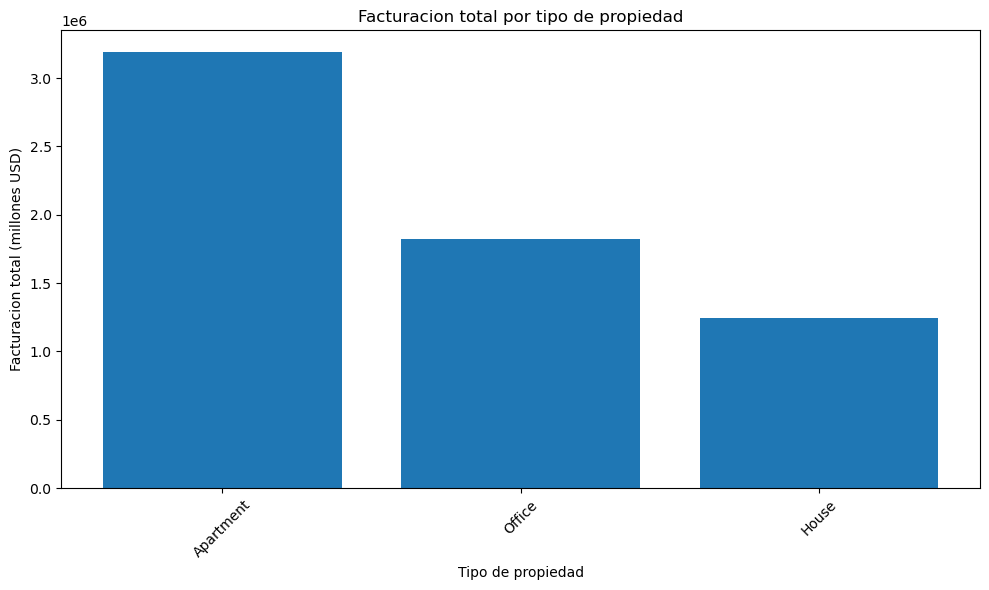

✅ Análisis completado correctamente


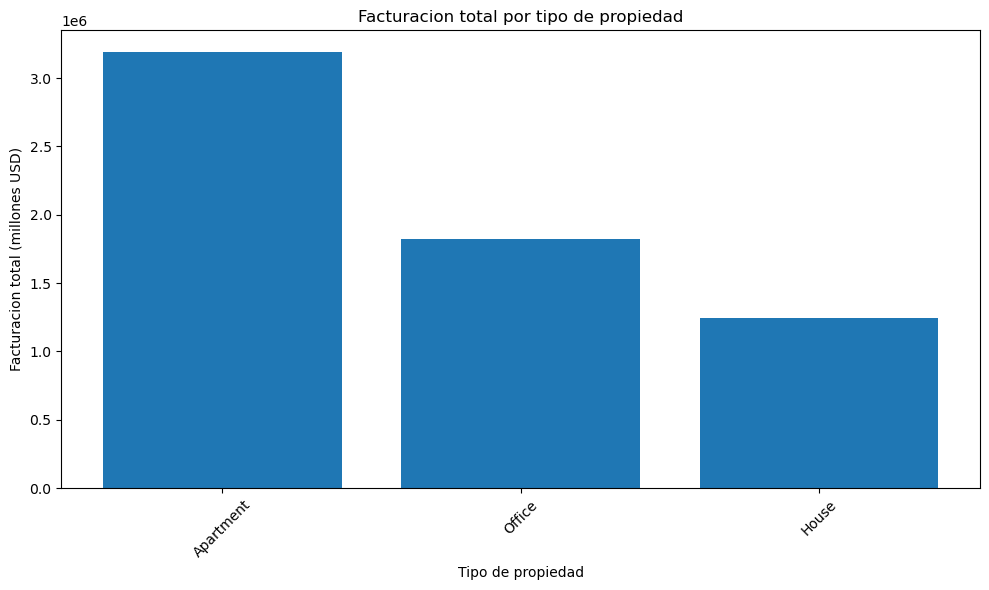

In [29]:
# Análisis básico de ventas
# Realizamos un análisis básico de las ventas por tipo de propiedad

query_analisis = """

SELECT 
    prop.property_type,
    COUNT(*) AS num_ventas,
    SUM(sales.saleprice_usd) AS facturacion_total,
    AVG(sales.saleprice_usd) AS facturacion_promedio,
    SUM(sales.saleprice_usd) / SUM(size_m2) AS preciom2_promedio
FROM 
    fact_sales sales
LEFT JOIN 
    dim_properties prop ON sales.property_id = prop.property_id
LEFT JOIN 
    dim_projects proj ON prop.project_id = proj.project_id
LEFT JOIN 
    dim_clients cli ON sales.client_id = cli.client_id
LEFT JOIN 
    dim_brokers brok ON sales.broker_id = brok.broker_id
GROUP BY   
    prop.property_type
ORDER BY 
    facturacion_total DESC
"""

try:
    # Ejecutar la consulta de análisis
    resultado_analisis = spark.sql(query_analisis)
    
    # Mostrar los resultados
    print("Análisis de ventas por tipo de propiedad:")
    display(resultado_analisis)
    
    # Convertir a pandas para visualización
    df_analisis_pd = resultado_analisis.toPandas()
    
    # Visualizar con matplotlib (si está disponible)
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        plt.bar(df_analisis_pd['property_type'], df_analisis_pd['facturacion_total'])
        plt.title('Facturacion total por tipo de propiedad')
        plt.xlabel('Tipo de propiedad')
        plt.ylabel('Facturacion total (millones USD)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        display(plt.gcf())
    except ImportError:
        print("Matplotlib no está disponible para visualización. Mostrando datos en formato tabular.")
        
    print("✅ Análisis completado correctamente")
except Exception as e:
    print(f"Error al ejecutar análisis: {str(e)}")

In [30]:
# Guardar el resultado del análisis
# Guardamos el resultado del análisis como archivo CSV

try:
    # Convertir a pandas para guardarlo como CSV
    df_analisis_pd.to_csv("/tmp/analisis_facturacion_tipo_propiedad.csv", index=False)
    
    # Subir al lakehouse
    mssparkutils.fs.put("Files/processed/analisis_facturacion_tipo_propiedad.csv", 
                        "/tmp/analisis_facturacion_tipo_propiedad.csv", True)
    
    print("✅ Resultado del análisis guardado como CSV en 'Files/processed/analisis_facturacion_tipo_propiedad.csv'")
except Exception as e:
    print(f"Error al guardar resultado: {str(e)}")

StatementMeta(, ab92b295-24dc-404a-b3db-3fee9c37f0a2, 32, Finished, Available, Finished)

✅ Resultado del análisis guardado como CSV en 'Files/processed/analisis_facturacion_tipo_propiedad.csv'
